In [9]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Defining the circular clusters
r1 = [random.uniform(0,1) for i in range(1000)]
t1 = [random.uniform(0,2*np.pi) for i in range(1000)]

px = [r*np.cos(t) for (r,t) in zip(r1,t1)]
py = [r*np.sin(t) for (r,t) in zip(r1,t1)]

r2 = [random.uniform(0,1) for i in range(1000)]
t2 = [random.uniform(0,2*np.pi) for i in range(1000)]

qx = [1+r*np.cos(t) for (r,t) in zip(r2,t2)]
qy = [1+r*np.sin(t) for (r,t) in zip(r2,t2)]

r3 = [random.uniform(0,1) for i in range(1000)]
t3 = [random.uniform(0,2*np.pi) for i in range(1000)]

mx = [r*np.cos(t) for (r,t) in zip(r2,t2)]
my = [1.6+r*np.sin(t) for (r,t) in zip(r2,t2)]

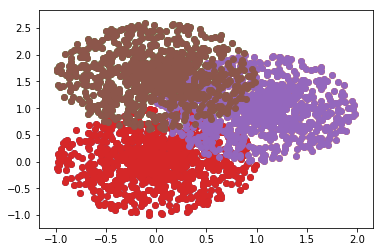

In [4]:
plt.scatter(px,py)
plt.scatter(qx,qy)
plt.scatter(mx,my)
plt.show()

In [5]:
# extending px and py by adding the other clusters to it
px.extend(qx)
px.extend(mx)

py.extend(qy)
py.extend(my)

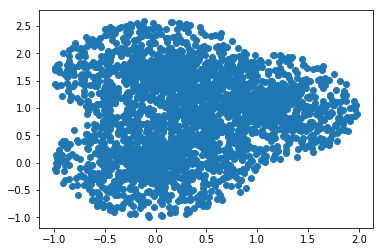

In [6]:
plt.scatter(px,py)
plt.show()

In [7]:
# creating a dataframe from px and py
dicp = {'xcor':px, 'ycor':py}
dfp = pd.DataFrame.from_dict(dicp)

In [10]:
# performing the k-means to find the clusters 
kmn = KMeans(n_clusters=3, random_state=10)
kmn.fit(dfp)
cents = pd.DataFrame(kmn.cluster_centers_)

In [12]:
dfp['label'] = kmn.labels_
kmn.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# identifying the resulting clusters (from the k-means algorithm)
dfp_zero = dfp[dfp.label == 0]
dfp_one = dfp[dfp.label == 1]
dfp_two = dfp[dfp.label == 2]

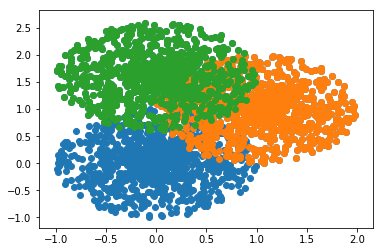

In [14]:
plt.scatter(px,py)
plt.scatter(qx,qy)
plt.scatter(mx,my)
plt.show()

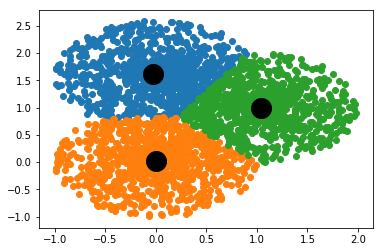

In [17]:
plt.scatter(dfp_zero.xcor,dfp_zero.ycor)
plt.scatter(dfp_one.xcor,dfp_one.ycor)
plt.scatter(dfp_two.xcor,dfp_two.ycor)
plt.scatter(cents[0],cents[1], s=400, color = 'black')
plt.show()